<a href="https://colab.research.google.com/github/utkarsh0702/Pytorch/blob/master/Pytorch2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train= datasets.MNIST("", train=True, download=True, transform= transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("", train=False, download=True, transform= transforms.Compose([transforms.ToTensor()]))

0it [00:00, ?it/s]

9920512it [00:01, 8771129.76it/s]                            


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 140716.09it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


1654784it [00:00, 2219057.17it/s]                            
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


8192it [00:00, 51063.47it/s]            


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
trainset= torch.utils.data.DataLoader(train, batch_size= 10, shuffle=True)
testset= torch.utils.data.DataLoader(test, batch_size= 10, shuffle=True)

In [5]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x,y= data[0][0], data[1][0]
print(x.shape)
print(y)

torch.Size([1, 28, 28])
tensor(3)


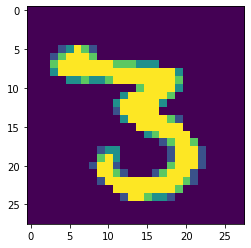

In [7]:
import matplotlib.pyplot as plt
#used view function because the data in x is in form of the tensor and we are required to change it's shape
plt.imshow(x.view(28,28))
plt.show()

In [10]:
total=0
dict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
  xr,yr= data
  for y in yr:
    dict[int(y)]+=1
    total+=1
  
print(dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
for i in dict:
  print(f"{i} : {round((dict[i]/total)*100,4)}")

0 : 9.8717
1 : 11.2367
2 : 9.93
3 : 10.2183
4 : 9.7367
5 : 9.035
6 : 9.8633
7 : 10.4417
8 : 9.7517
9 : 9.915


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
class Net(nn.Module):
  def __init__(self):
    # used super because it will call the nn.Module class and use it's functionalities
    super().__init__()
    self.fc1= nn.Linear(28*28, 64)
    self.fc2= nn.Linear(64, 64)
    self.fc3= nn.Linear(64, 64)
    self.fc4= nn.Linear(64, 10)

  def forward(self, x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= F.relu(self.fc3(x))
    x= self.fc4(x)
    return F.log_softmax(x, dim=1)


net= Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
import torch.optim as optim
optimizer= optim.Adam(net.parameters(), lr=0.001)
EPOCHS=5
for epoch in range(EPOCHS):
  for data in trainset:
    x,y= data
    net.zero_grad()
    output= net(x.view(-1, 28*28))
    loss= F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.2278, grad_fn=<NllLossBackward>)
tensor(0.3773, grad_fn=<NllLossBackward>)
tensor(0.0564, grad_fn=<NllLossBackward>)
tensor(0.0052, grad_fn=<NllLossBackward>)
tensor(0.0317, grad_fn=<NllLossBackward>)


In [16]:
correct=0
total=0
with torch.no_grad():
  for data in trainset:
    x,y= data
    output= net(x.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct+=1
      total+=1
    
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.987


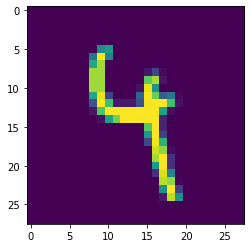

In [17]:
plt.imshow(x[0].view(28,28))
plt.show()

In [18]:
print(torch.argmax(net(x[0].view(-1,28*28))[0]))

tensor(4)
